# Graphene-U-Net Usage Example


## Step 0: Install Dependencies

**NERSC Note:**
  * Use pytorch-1.71-gpu kernel
  * Uncomment the following cell when running the notebook for the first time to install the required OpenCV libraray

In [17]:
#%pip install --user opencv-
import importlib, Microscopy_Unet; importlib.reload(Microscopy_Unet)

<module 'Microscopy_Unet' from 'C:\\Users\\aero\\project_deeplearning\\graphene-u-net\\Microscopy_Unet.py'>

## Step 1: Import Library

In [18]:
from Microscopy_Unet import Segmentation_Network

## Step 2: Instantiate Network

D is the 'Depth' of the network/number of down convolutional blocks (which will be followed with D-1 up convolutional blocks)

W is the network 'Width' which is the power of 2 number of features in the first block (which will be doubled for every subsequent block in the contraction path, and then divided by two in the contraction path)

model_name is the name of the model used to save the network which will also be used to save training progress data

save_freq is the frequency in terms of epochs how often the network will be saved to disk

In [19]:
network= Segmentation_Network(D = 4,       #network depth
                W = 5,                     #netork width
                LR = .0001,                #learning rate
                model_name = "UNET_GRPH",  #name model for checkpoints
                save_freq=10               #frequency of network checkpoint saves
               )


initializing model
>>>from blank slate


## Step 3: Load Training Data

Next, we load the training data from the `training_images/` folder using GetDataSet, where data_path is the path to the folder where the labeled training data is. The term 'handle' is the marker name for the labels of the training data. The naming convention of the training data is as such: For every input image "`filename.png`" in the data_path folder there should be a corresponding label image with the name "`filename_<handle>.png`". For example, if the handle is "`_LABEL`" then for a folder with input images named "`training_img_0.png`", "`training_img_1.png`" there should be corresponging files named "`training_img_0_LABEL.png`", "`training_img_1_LABEL.png`" to get proper behaivior.
    
Once data is loaded, it is important to shuffle it.

In [20]:
network.GetDataSet(data_path = "training_images/", handle="_LABEL") #load in dataset
network.DataShuffle(seed = 4)

## Step 4: Train Network

Now we train the network using K-Fold cross Validation where K = 4

In [21]:
network.Kfold(k=4, epochs=15)


==========RUNNING 4-FOLD CROSS VALIDATION==========

 ###############STARTING FOLD: 0 of 4###############

initializing model
>>>from blank slate

Evaluating... DICE class 0: 0.0 DICE class 1: 0.245


C:\Users\aero\project_deeplearning\graphene-u-net\Microscopy_Unet.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.metrics_df = pd.concat(


epoch:0		model:UNET_GRPH_fold_0		iteration:97		loss:0.38345 --> saving model


C:\Users\aero\project_deeplearning\graphene-u-net\Microscopy_Unet.py:63: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  },



Evaluating... DICE class 0: 0.925 DICE class 1: 0.0
epoch:1		model:UNET_GRPH_fold_0		iteration:97		loss:0.34064
Evaluating... DICE class 0: 0.925 DICE class 1: 0.003
epoch:2		model:UNET_GRPH_fold_0		iteration:97		loss:0.32387
Evaluating... DICE class 0: 0.959 DICE class 1: 0.782
epoch:3		model:UNET_GRPH_fold_0		iteration:97		loss:0.38307
Evaluating... DICE class 0: 0.972 DICE class 1: 0.828
epoch:4		model:UNET_GRPH_fold_0		iteration:97		loss:0.01180
Evaluating... DICE class 0: 0.969 DICE class 1: 0.827
epoch:5		model:UNET_GRPH_fold_0		iteration:97		loss:0.27965
Evaluating... DICE class 0: 0.974 DICE class 1: 0.848
epoch:6		model:UNET_GRPH_fold_0		iteration:97		loss:0.10135
Evaluating... DICE class 0: 0.969 DICE class 1: 0.766
epoch:7		model:UNET_GRPH_fold_0		iteration:97		loss:0.04739
Evaluating... DICE class 0: 0.978 DICE class 1: 0.854
epoch:8		model:UNET_GRPH_fold_0		iteration:97		loss:0.14160
Evaluating... DICE class 0: 0.978 DICE class 1: 0.858
epoch:9		model:UNET_GRPH_fold_0		it

C:\Users\aero\project_deeplearning\graphene-u-net\Microscopy_Unet.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.metrics_df = pd.concat(


epoch:0		model:UNET_GRPH_fold_1		iteration:97		loss:0.47783 --> saving model

Evaluating... DICE class 0: 0.931 DICE class 1: 0.0
epoch:1		model:UNET_GRPH_fold_1		iteration:97		loss:0.05932
Evaluating... DICE class 0: 0.958 DICE class 1: 0.588
epoch:2		model:UNET_GRPH_fold_1		iteration:97		loss:0.30251
Evaluating... DICE class 0: 0.944 DICE class 1: 0.362
epoch:3		model:UNET_GRPH_fold_1		iteration:97		loss:0.09326
Evaluating... DICE class 0: 0.97 DICE class 1: 0.811
epoch:4		model:UNET_GRPH_fold_1		iteration:97		loss:0.10082
Evaluating... DICE class 0: 0.977 DICE class 1: 0.841
epoch:5		model:UNET_GRPH_fold_1		iteration:97		loss:0.04068
Evaluating... DICE class 0: 0.979 DICE class 1: 0.853
epoch:6		model:UNET_GRPH_fold_1		iteration:97		loss:0.14295
Evaluating... DICE class 0: 0.979 DICE class 1: 0.843
epoch:7		model:UNET_GRPH_fold_1		iteration:97		loss:0.13595
Evaluating... DICE class 0: 0.979 DICE class 1: 0.857
epoch:8		model:UNET_GRPH_fold_1		iteration:97		loss:0.05004
Evaluating...

C:\Users\aero\project_deeplearning\graphene-u-net\Microscopy_Unet.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.metrics_df = pd.concat(


epoch:0		model:UNET_GRPH_fold_2		iteration:97		loss:0.76515 --> saving model

Evaluating... DICE class 0: 0.932 DICE class 1: 0.0
epoch:1		model:UNET_GRPH_fold_2		iteration:97		loss:0.82436
Evaluating... DICE class 0: 0.932 DICE class 1: 0.0
epoch:2		model:UNET_GRPH_fold_2		iteration:97		loss:0.78016
Evaluating... DICE class 0: 0.945 DICE class 1: 0.359
epoch:3		model:UNET_GRPH_fold_2		iteration:97		loss:0.17057
Evaluating... DICE class 0: 0.959 DICE class 1: 0.599
epoch:4		model:UNET_GRPH_fold_2		iteration:97		loss:0.10307
Evaluating... DICE class 0: 0.968 DICE class 1: 0.734
epoch:5		model:UNET_GRPH_fold_2		iteration:97		loss:0.06848
Evaluating... DICE class 0: 0.965 DICE class 1: 0.775
epoch:6		model:UNET_GRPH_fold_2		iteration:97		loss:0.15626
Evaluating... DICE class 0: 0.974 DICE class 1: 0.8
epoch:7		model:UNET_GRPH_fold_2		iteration:97		loss:0.04105
Evaluating... DICE class 0: 0.962 DICE class 1: 0.772
epoch:8		model:UNET_GRPH_fold_2		iteration:97		loss:0.09143
Evaluating... DI

C:\Users\aero\project_deeplearning\graphene-u-net\Microscopy_Unet.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.metrics_df = pd.concat(


epoch:0		model:UNET_GRPH_fold_3		iteration:98		loss:0.71435 --> saving model

Evaluating... DICE class 0: 0.929 DICE class 1: 0.0
epoch:1		model:UNET_GRPH_fold_3		iteration:98		loss:0.49580
Evaluating... DICE class 0: 0.934 DICE class 1: 0.151
epoch:2		model:UNET_GRPH_fold_3		iteration:98		loss:0.11103
Evaluating... DICE class 0: 0.962 DICE class 1: 0.669
epoch:3		model:UNET_GRPH_fold_3		iteration:98		loss:0.14270
Evaluating... DICE class 0: 0.973 DICE class 1: 0.795
epoch:4		model:UNET_GRPH_fold_3		iteration:98		loss:0.16998
Evaluating... DICE class 0: 0.962 DICE class 1: 0.656
epoch:5		model:UNET_GRPH_fold_3		iteration:98		loss:0.07381
Evaluating... DICE class 0: 0.978 DICE class 1: 0.848
epoch:6		model:UNET_GRPH_fold_3		iteration:98		loss:0.18588
Evaluating... DICE class 0: 0.957 DICE class 1: 0.769
epoch:7		model:UNET_GRPH_fold_3		iteration:98		loss:0.04466
Evaluating... DICE class 0: 0.966 DICE class 1: 0.801
epoch:8		model:UNET_GRPH_fold_3		iteration:98		loss:0.04928
Evaluating..

## Step 5: Visualize Training Progress Over Epochs

Data about the training progress is automatically saved in CSV Files associated with the network name for convenience of observing the progress over time. These can be loaded into the notebook using pandas and visualized using matplotlib.

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from os import path

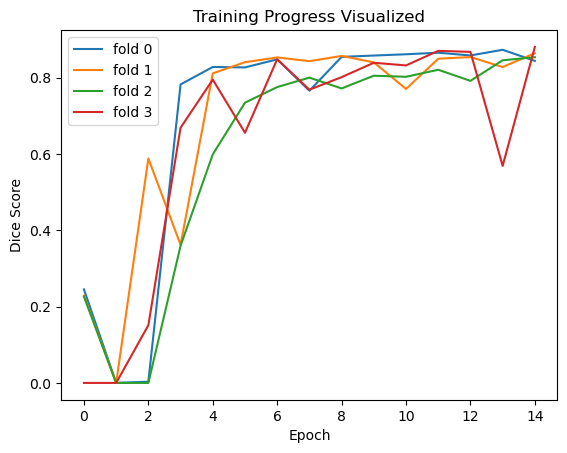

In [5]:
name = "UNET_GRPH"
plt.figure()

for fold in range(4):
    file = name+"_fold_"+str(fold)+".csv"
    if path.exists(file):
        data = pd.read_csv(file)['F1_1'].to_numpy()
        plt.plot(data, label = 'fold '+str(fold))

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Training Progress Visualized')
plt.show()

## Step 6: Load and Use Model

Now that we have trained the model, we can load it and then run it on an example image. For simplicity we a re-use a training image.

First we load an image.

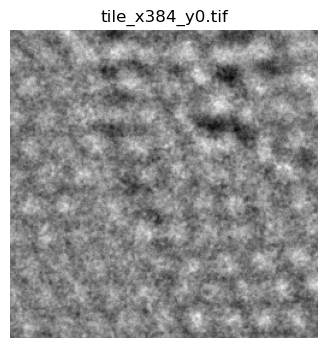

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- ① 自分のタイル画像を指定 ---
img_path = Path("./inference_tiles/tile_x384_y0.tif")

# --- ② 画像の読み込み ---
img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED).astype(np.float32)

# --- ③ 表示用に正規化（0～1） ---
img_disp = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)

# --- ④ Matplotlib で可視化 ---
plt.figure(figsize=(4,4))
plt.imshow(img_disp, cmap='gray')
plt.title(f"{img_path.name}")
plt.axis('off')
plt.show()


Then, we load the trained model into a new network instance.

In [8]:
# --- 先頭でインポート ---
from Microscopy_Unet import Segmentation_Network

trained_network= Segmentation_Network(D = 4,   #network depth
                W = 5,                         #netork width
                LR = .0001,                    #learning rate
                model_name = "UNET_GRPH_demo", #name model for checkpoints
                save_freq=10,                  #frequency of network checkpoint saves
                load = "UNET_GRPH_fold_0.pth"  #path to trained network                              
               ) 


initializing model
>>>from saved model
loading model from UNET_GRPH_fold_0.pth
reseting optimizer


Finally, we use this model to predict the segmentation for the loaded image.

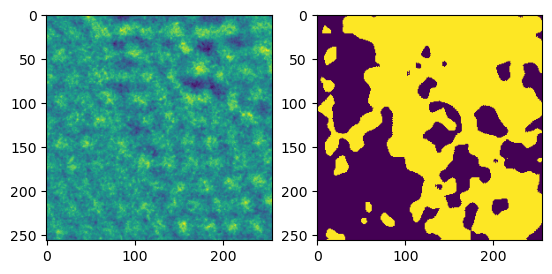

In [9]:
output = trained_network.infer(img)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(output)
plt.show()